In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('Admission_Predict.csv')  # Rename the file if needed
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Remove unwanted spaces from column names
df.columns = df.columns.str.strip()

# Drop 'Serial No.' column if it exists
if 'Serial No.' in df.columns:
    df = df.drop('Serial No.', axis=1)

# Check for null values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
        GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.

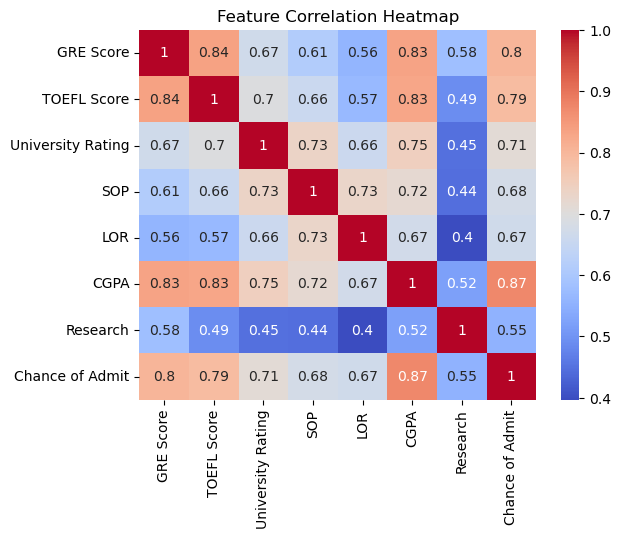

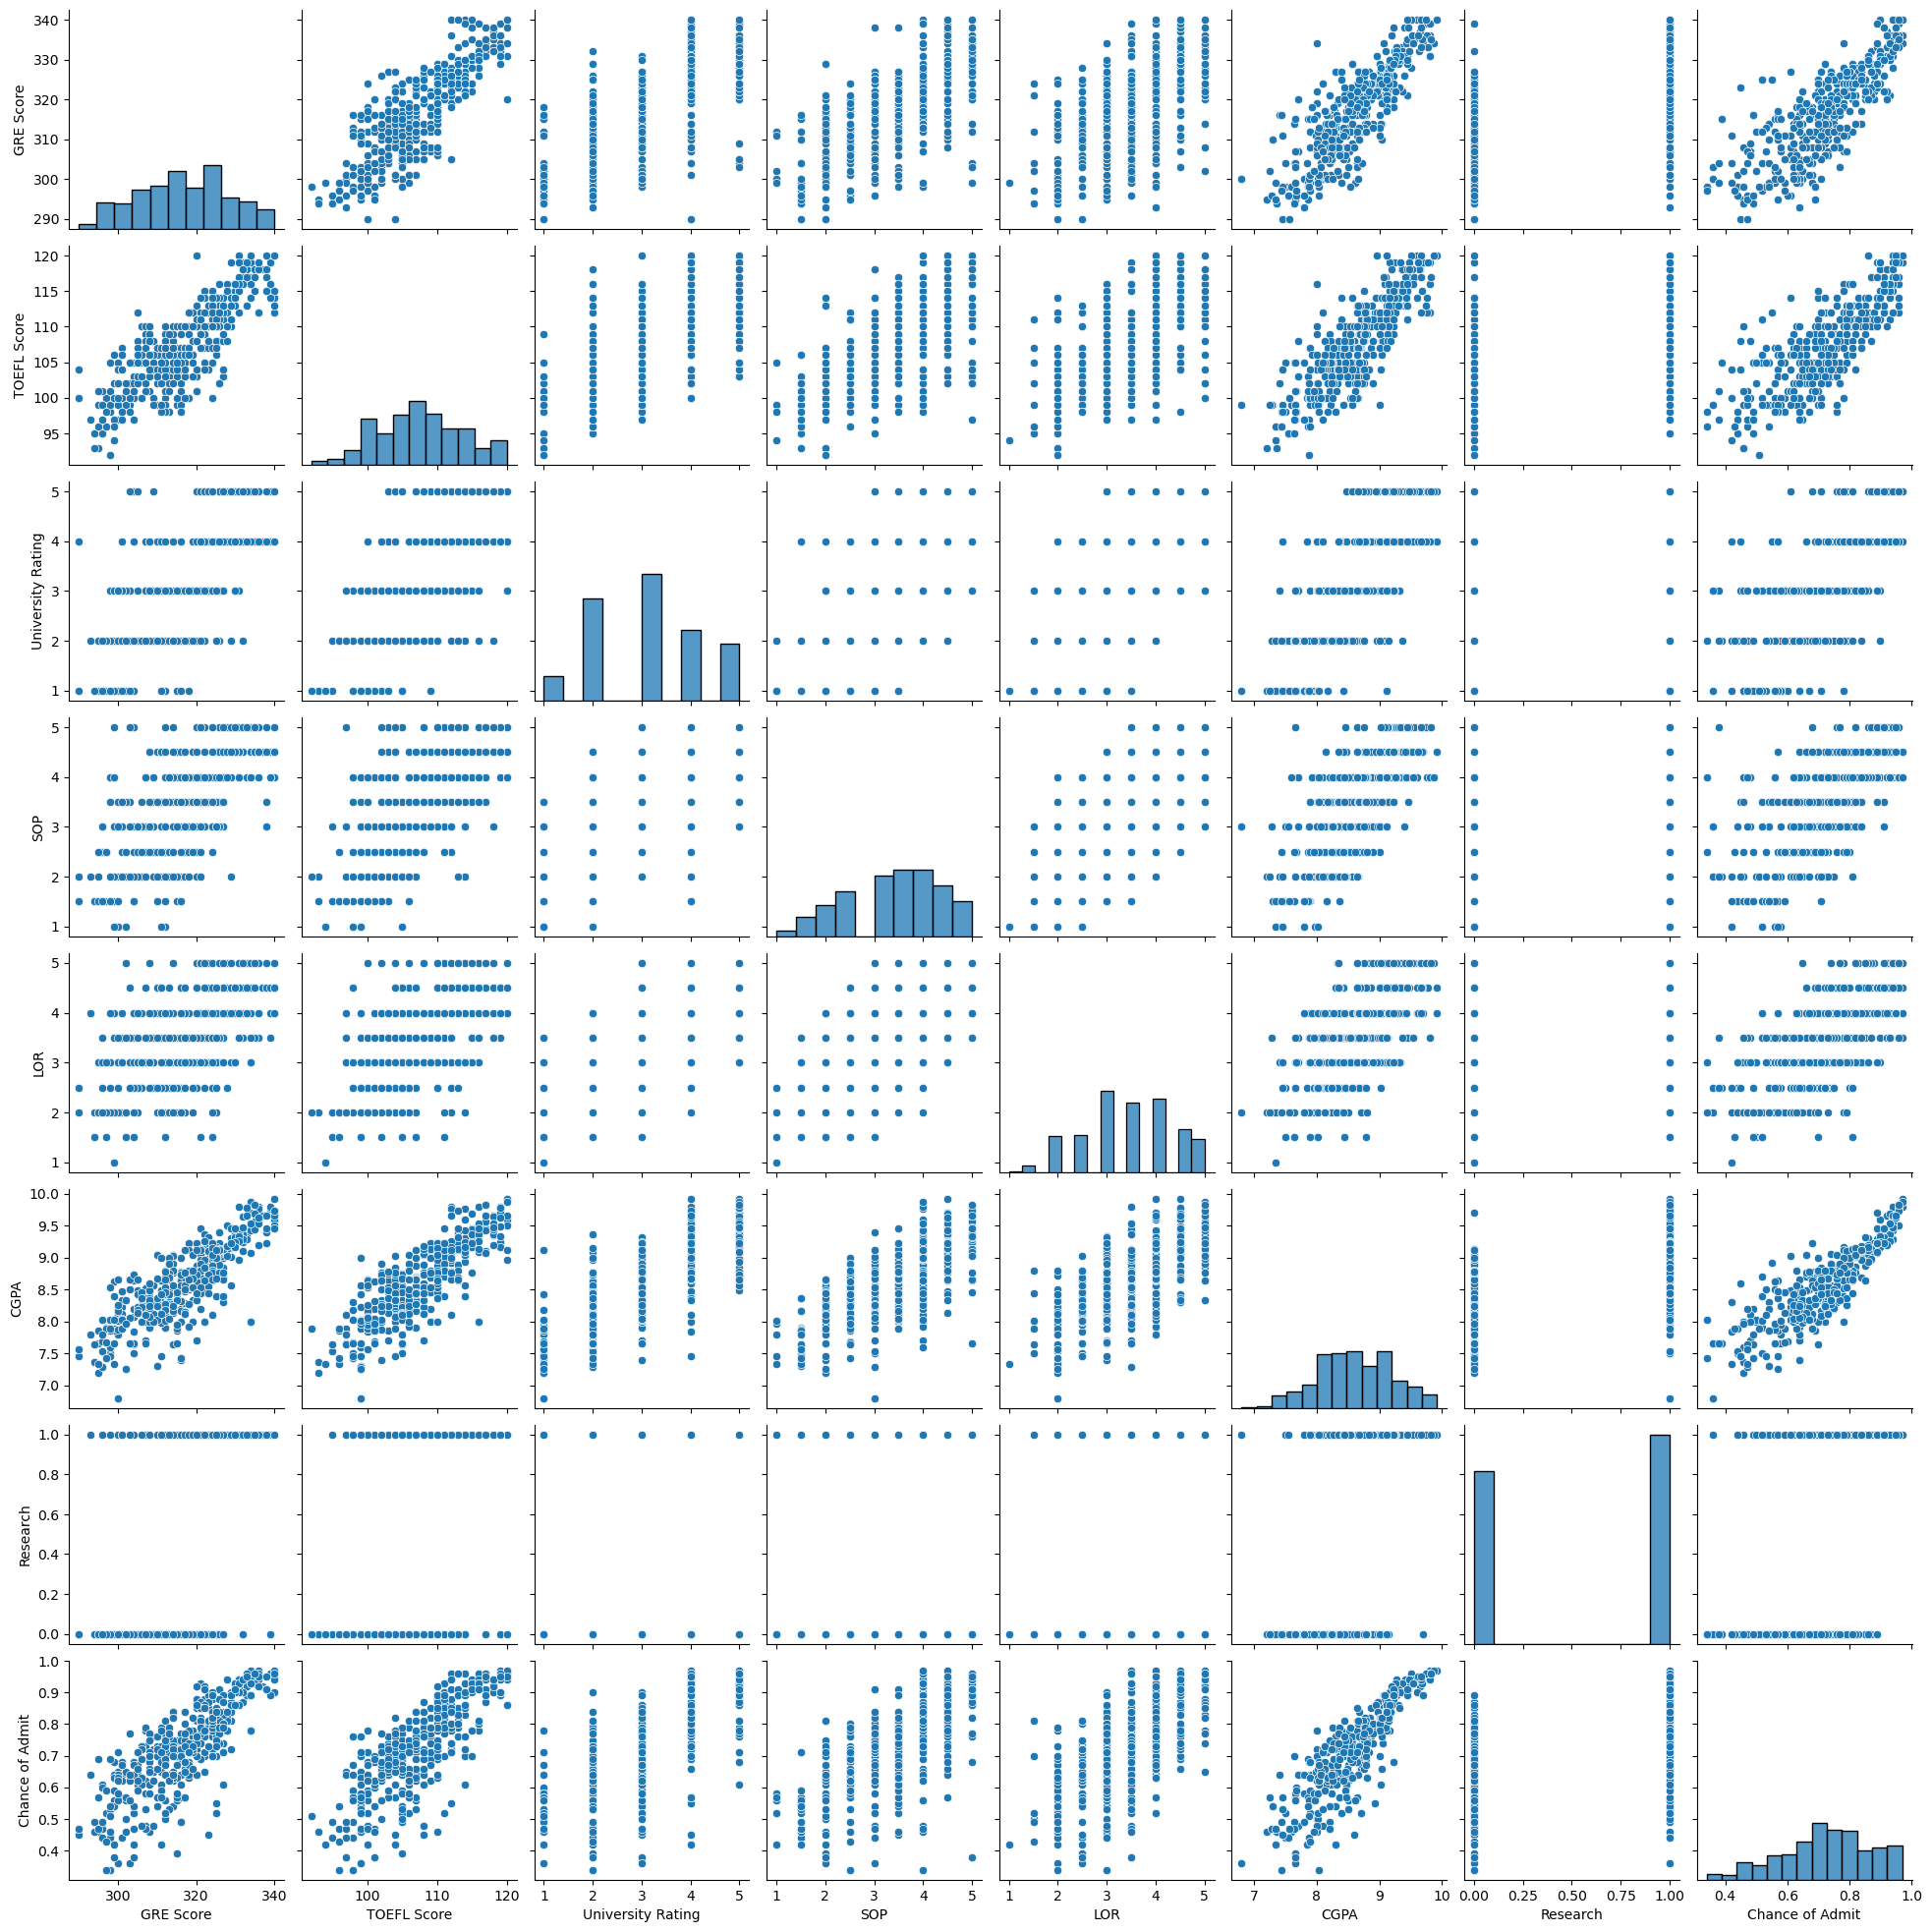

In [9]:
# Heatmap to see correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for scatterplot matrix
sns.pairplot(df)
plt.show()


In [10]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = df['Chance of Admit']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [19]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.82
Mean Squared Error: 0.0046


In [21]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [23]:
# Example input: GRE=320, TOEFL=110, University Rating=4, SOP=4, LOR=4, CGPA=9.0, Research=1
new_data = np.array([[337,118,4,4.5,4.5,9.65,1]])
predicted_admit_chance = model.predict(new_data)[0]
print("Predicted Chance of Admission:", round(predicted_admit_chance, 4))


Predicted Chance of Admission: 0.9468


C:\Users\desai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import joblib
joblib.dump(model, 'admission_model1.pkl')  # Save model


['admission_model1.pkl']

In [27]:
loaded_model = joblib.load('admission_model1.pkl')


In [29]:
import pickle


In [31]:
with open('admission_model1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [33]:
with open('admission_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
